<a href="https://colab.research.google.com/github/santosh4568/Oral-Cancer-Detection-Using-CNN/blob/main/Oral_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image

In [3]:
BATCH_SIZE = 12
IMAGE_SIZE = 256
EPOCHS = 60
CHANNELS = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Datasets/oral_dataset/OralCancer",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 131 files belonging to 2 classes.


In [5]:
len(dataset)

11

In [6]:
class_names = dataset.class_names
class_names

['cancer', 'non-cancer']

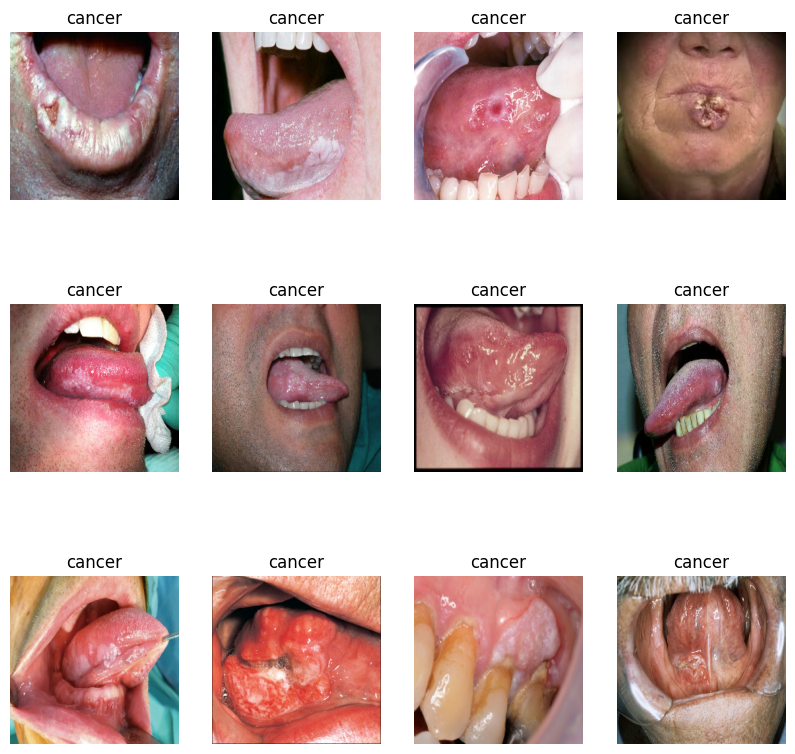

In [7]:
plt.figure(figsize = (10,10))
for batch_size , label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(batch_size[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
len(train_ds)

8

In [11]:
len(val_ds)

1

In [12]:
len(test_ds)

2

In [13]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

In [15]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.build(input_shape=input_shape)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (12, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (12, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (12, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (12, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (12, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (12, 60, 60, 64)         

In [19]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/60
8/8 [==============================] - 22s 2s/step - loss: 1.6799 - accuracy: 0.5833 - val_loss: 0.8081 - val_accuracy: 0.5833
Epoch 2/60
8/8 [==============================] - 13s 2s/step - loss: 0.7213 - accuracy: 0.5417 - val_loss: 0.7030 - val_accuracy: 0.5833
Epoch 3/60
8/8 [==============================] - 14s 2s/step - loss: 0.6536 - accuracy: 0.6042 - val_loss: 0.6519 - val_accuracy: 0.5833
Epoch 4/60
8/8 [==============================] - 14s 2s/step - loss: 0.6877 - accuracy: 0.6458 - val_loss: 0.6450 - val_accuracy: 0.5833
Epoch 5/60
8/8 [==============================] - 13s 2s/step - loss: 0.6615 - accuracy: 0.6562 - val_loss: 0.6128 - val_accuracy: 0.6667
Epoch 6/60
8/8 [==============================] - 13s 2s/step - loss: 0.6557 - accuracy: 0.6667 - val_loss: 0.6337 - val_accuracy: 0.5833
Epoch 7/60
8/8 [==============================] - 13s 2s/step - loss: 0.6518 - accuracy: 0.5833 - val_loss: 0.6097 - val_accuracy: 0.5833
Epoch 8/60
8/8 [==================

In [20]:
model.evaluate(test_ds)

2/2 [==============================] - 5s 711ms/step - loss: 0.1274 - accuracy: 0.9167


[0.12742121517658234, 0.9166666865348816]

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']

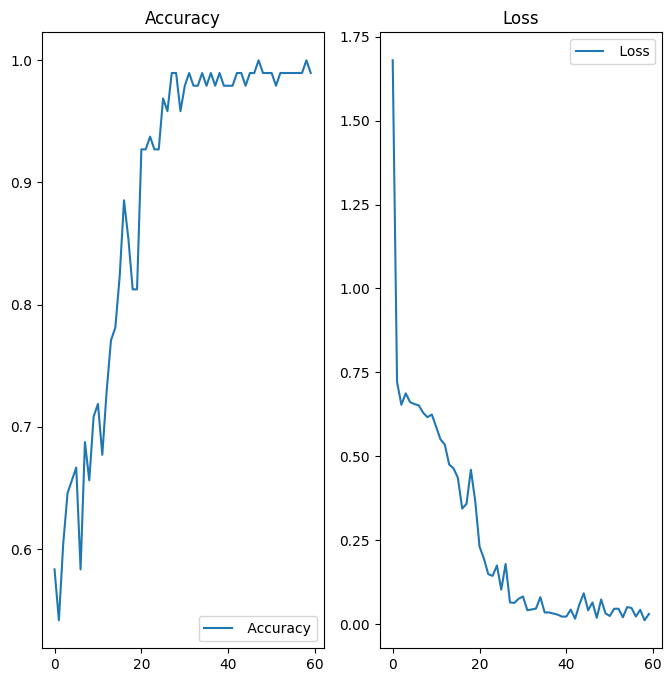

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [29]:
image_path = "/content/drive/MyDrive/Datasets/oral_dataset/OralCancer/cancer/41457tn.jpg"  # Replace with the actual path to your local image
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
image_array = tf.keras.preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)

1/1 [==============================] - 0s 49ms/step


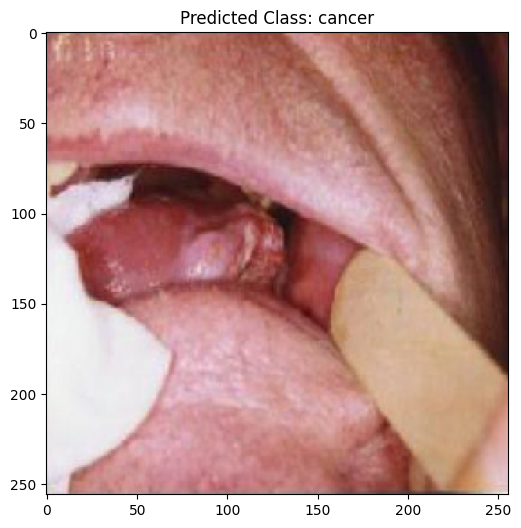

The predicted class is: cancer


In [30]:
pred = model.predict(scaled_img)

# Get the class name with the highest probability
output = class_names[np.argmax(pred)]

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f'Predicted Class: {output}')
plt.show()

print(f"The predicted class is: {output}")